In [1]:
import numpy as np
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
import random
import seaborn as sns
from sklearn.cluster import KMeans
import cv2
from keras.models import Model
#from keras.optimizers import Adam
#from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv2D, Activation, Add, Conv2DTranspose
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
import keras.metrics


In [2]:
%%time
images=[]
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/aachen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/bochum'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/bremen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)      
        
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/cologne'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)

for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/darmstadt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)      
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/dusseldorf'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)  
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/erfurt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)  
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Train/hamburg'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Val/frankfurt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)   
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Val/lindau'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)   
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Input/Val/munster'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)   

CPU times: total: 1min 33s
Wall time: 2min 34s


In [3]:
%%time
masksg=[]
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/aachen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/bochum'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    #    img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/bremen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/cologne'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/darmstadt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)  
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/dusseldorf'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res) 
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/erfurt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res) 
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Train/hamburg'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)  
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Val/frankfurt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Val/lindau'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
for dirname, _, filenames in os.walk('E:/Dataset/cityScape2-wb/Reference/gtFine/Val/munster'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)

CPU times: total: 19.9 s
Wall time: 34.7 s


In [4]:
width = 128
height = 128
classes = 35

In [5]:
model_1 = ResNet50(include_top=False,
    weights="imagenet",
    input_shape=(width, height, 3)
   )

In [6]:
model_1.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [7]:
def fcn(resnet, classes = 35, fcn8 = False, fcn16 = False):
    pool5 = resnet.get_layer('conv5_block3_out').output
    pool4 = resnet.get_layer('conv4_block6_out').output
    pool3 = resnet.get_layer('conv3_block3_out').output
    
    conv_6 = Conv2D(1024, (7, 7), activation='relu', padding='same', name="conv_6")(pool5)
    conv_7 = Conv2D(1024, (1, 1), activation='relu', padding='same', name="conv_7")(conv_6)
    
    conv_8 = Conv2D(classes, (1, 1), activation='relu', padding='same', name="conv_8")(pool4)
    conv_9 = Conv2D(classes, (1, 1), activation='relu', padding='same', name="conv_9")(pool3)
    
    deconv_7 = Conv2DTranspose(classes, kernel_size=(2,2), strides=(2,2))(conv_7)
    add_1 = Add()([deconv_7, conv_8])
    deconv_8 = Conv2DTranspose(classes, kernel_size=(2,2), strides=(2,2))(add_1)
    add_2 = Add()([deconv_8, conv_9])
    deconv_9 = Conv2DTranspose(classes, kernel_size=(8,8), strides=(8,8))(add_2)
    
    if fcn8 :
        
        output_layer = Activation('softmax')(deconv_9)
    elif fcn16 :
        deconv_10 = Conv2DTranspose(classes, kernel_size=(16,16), strides=(16,16))(add_1)
        output_layer = Activation('softmax')(deconv_10)
    else:
        deconv_11 = Conv2DTranspose(classes, kernel_size=(32,32), strides=(32,32))(conv_7)
        output_layer = Activation('softmax')(deconv_11)
    
    
    model = Model(inputs=resnet.input, outputs=output_layer)
    return model

In [8]:
model = fcn(model_1, fcn8=True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", 
    patience=10, 
    mode ="max", 
    verbose=2, 
    restore_best_weights=True
)

In [11]:
%%time
    
results = model.fit(np.asarray(images), to_categorical(np.asarray(masksg), num_classes=35),epochs=500
                    ,validation_split=0.3 
                    ,callbacks = [stop_early]
)
 #steps_per_epoch=2500,#len(X_train) // BS


Epoch 1/500
42/42 [==============================] - 767s 16s/step - loss: 1.8164 - accuracy: 0.5171 - val_loss: 1.9811 - val_accuracy: 0.4968
Epoch 2/500
42/42 [==============================] - 637s 15s/step - loss: 0.9984 - accuracy: 0.7555 - val_loss: 2.6468 - val_accuracy: 0.3990
Epoch 3/500
42/42 [==============================] - 634s 15s/step - loss: 0.8922 - accuracy: 0.7812 - val_loss: 1.3634 - val_accuracy: 0.6565
Epoch 4/500
42/42 [==============================] - 757s 17s/step - loss: 0.8272 - accuracy: 0.7960 - val_loss: 1.6502 - val_accuracy: 0.6179
Epoch 5/500
42/42 [==============================] - 648s 15s/step - loss: 0.7958 - accuracy: 0.8026 - val_loss: 1.4461 - val_accuracy: 0.6552
Epoch 6/500
42/42 [==============================] - 635s 15s/step - loss: 0.7593 - accuracy: 0.8109 - val_loss: 1.1545 - val_accuracy: 0.7185
Epoch 7/500
42/42 [==============================] - 782s 17s/step - loss: 0.7248 - accuracy: 0.8189 - val_loss: 1.2839 - val_accuracy: 0.7104

In [18]:
import matplotlib.pyplot as plt

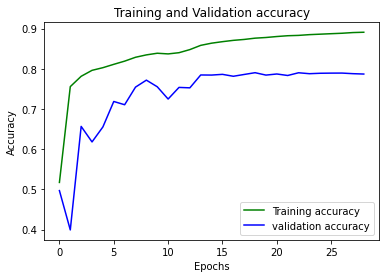

In [26]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
epochs = range(0,29)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

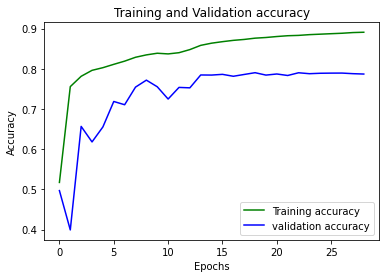

<Figure size 432x288 with 0 Axes>

In [27]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
epochs = range(0,29)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy.png')

In [22]:
!pip install visualkeras

  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)


In [23]:
import visualkeras

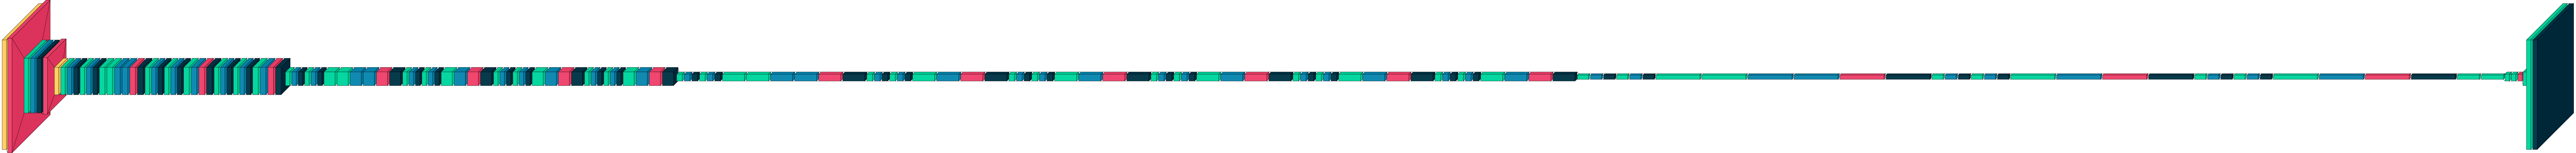

In [24]:
visualkeras.layered_view(model) 

In [ ]:
model.save('EarlyStopping.h5')